In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
import glob
import cv2
from matplotlib import pyplot
import matplotlib.pyplot as plt
drive.mount('/content/drive/')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/WHO/WHO'
filenames = glob.glob("/content/drive/MyDrive/Colab Notebooks/WHO/WHO/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
dfs
# Concatenate into one DataFrame
#big_frame = pd.concat(dfs, ignore_index=True)

In [3]:
# Concatenate into one DataFrame
big_frame = pd.concat(dfs, ignore_index=True)
big_frame

,Location,Indicator,Period,First Tooltip,Dim2,Dim1,Hale Expectency,Life expectany,Unnamed: 6,% OF HALE in life expectancy
0,Afghanistan,Hepatitis B surface antigen (HBsAg) prevalence...,2015,0.5 [0.29-0.78],NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Hepatitis B surface antigen (HBsAg) prevalence...,2015,1.29 [0.83-1.91],NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Hepatitis B surface antigen (HBsAg) prevalence...,2015,0.22 [0.12-0.34],NaN,NaN,NaN,NaN,NaN,NaN
3,Andorra,Hepatitis B surface antigen (HBsAg) prevalence...,2015,0.08 [0-1.65],NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,Hepatitis B surface antigen (HBsAg) prevalence...,2015,4.85 [3.29-6.81],NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
150560,Zimbabwe,Proportion of population with primary reliance...,2004,33,NaN,NaN,NaN,NaN,NaN,NaN
150561,Zimbabwe,Proportion of population with primary reliance...,2003,33,NaN,NaN,NaN,NaN,NaN,NaN
150562,Zimbabwe,Proportion of population with primary reliance...,2002,34,NaN,NaN,NaN,NaN,NaN,NaN
150563,Zimbabwe,Proportion of population with primary reliance...,2001,34,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150565 entries, 0 to 150564
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Location                      150565 non-null  object 
 1   Indicator                     150565 non-null  object 
 2   Period                        150565 non-null  object 
 3   First Tooltip                 150421 non-null  object 
 4   Dim2                          7146 non-null    object 
 5   Dim1                          118567 non-null  object 
 6   Hale Expectency               144 non-null     float64
 7   Life expectany                144 non-null     float64
 8   Unnamed: 6                    144 non-null     float64
 9   % OF HALE in life expectancy  144 non-null     float64
dtypes: float64(4), object(6)
memory usage: 11.5+ MB


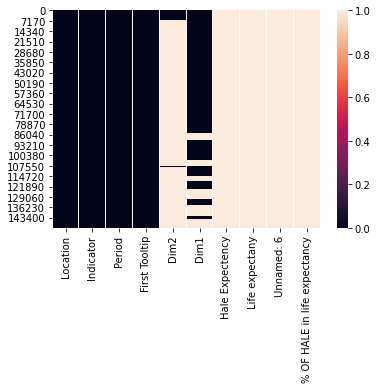

In [4]:
#Null value analysis of the combined datasets 
big_frame.info()
sns.heatmap(big_frame.isna())

There are many inconsistent columns of data that must be purged for the sake of accurate data analysis.

In [5]:
big_frame = big_frame.dropna(axis=1)
big_frame

,Location,Indicator,Period
0,Afghanistan,Hepatitis B surface antigen (HBsAg) prevalence...,2015
1,Albania,Hepatitis B surface antigen (HBsAg) prevalence...,2015
2,Algeria,Hepatitis B surface antigen (HBsAg) prevalence...,2015
3,Andorra,Hepatitis B surface antigen (HBsAg) prevalence...,2015
4,Angola,Hepatitis B surface antigen (HBsAg) prevalence...,2015
...,...,...,...
150560,Zimbabwe,Proportion of population with primary reliance...,2004
150561,Zimbabwe,Proportion of population with primary reliance...,2003
150562,Zimbabwe,Proportion of population with primary reliance...,2002
150563,Zimbabwe,Proportion of population with primary reliance...,2001


In [6]:
big_frame.corr()

""


In [7]:
X1=big_frame.drop(['Period'],axis=1)
Y1=big_frame['Period']

In [8]:
big_frame.corr()>.7

""


There are some inconsistencies within the different datasets so I will process specific groups of data in the sake of information acquisition.

In [9]:
#Suicide Rate
jisatsu = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WHO/WHO/crudeSuicideRates.csv')

#Substance Abuse
subabuse= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WHO/WHO/alcoholSubstanceAbuse.csv')

In [10]:
jisatsu.corr()

,Period,First Tooltip
Period,1.000000,-0.281737
First Tooltip,-0.281737,1.000000


In [11]:
subabuse.corr()

,Period,First Tooltip
Period,1.000000,-0.004279
First Tooltip,-0.004279,1.000000


In [12]:
subabuse_jisatsu = pd.concat([subabuse, jisatsu])

In [13]:
subabuse_jisatsu.corr(method='pearson')

,Period,First Tooltip
Period,1.000000,-0.169316
First Tooltip,-0.169316,1.000000


In [14]:
subabuse_jisatsu.corr(method='kendall')

,Period,First Tooltip
Period,1.000000,-0.190378
First Tooltip,-0.190378,1.000000


In [15]:
subabuse_jisatsu_df = pd.DataFrame(data=subabuse_jisatsu)

After a few different methds of analysis, I see that there is no collinearity between the different datasets within my WHO collection of csv files but the integrity of the data is in question.